# PCA 

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io  
from sklearn.decomposition import PCA
import glob 
import time
import glob
import xlsxwriter
import math 

total_time = 0.0
sum_fit = 0.0
sum_transform = 0.0
start_total = time.process_time()
i = 0

os.mkdir('pca-output-40-comps') 
path = "resized-output-next-1000/*.jpeg*"
for image in glob.glob(path):
    img = io.imread(image)
    img = img.astype(np.uint8)
#    print(img.shape)
#    plt.imshow(img, cmap="gray") 
    
    start_fit = time.process_time()
    fit_pca = PCA(n_components=40).fit(img)  # approx 98.143%(1), 96.61%(2) information in an image [PC1 greater, more info]
    sum_fit += time.process_time() - start_fit
    
    start_transform = time.process_time()
    transformed = fit_pca.transform(img)
    sum_transform += time.process_time() - start_transform
    
    projected = fit_pca.inverse_transform(transformed)
    projected = projected.astype(np.uint8)
#     print(transformed.shape)
#     plt.imshow(projected, cmap="gray")
    io.imsave("pca-output-40-comps/image%05i.jpeg" %i, projected)
    i += 1 
    
total_time += time.process_time() - start_total

avg_fit = sum_fit/1000;
avg_transform = sum_transform/1000

print("Total Fit Time: ", sum_fit)
print("Average Fit time: ", avg_fit)
print("Total Transform Time: ", sum_transform)
print("Average Transform time: ", avg_transform)
print("Total Time required for execution: ", total_time)


Total Fit Time:  222.890625
Average Fit time:  0.222890625
Total Transform Time:  2.65625
Average Transform time:  0.00265625
Total Time required for execution:  247.734375


In [13]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [15]:
workbook = xlsxwriter.Workbook('PCA-Dimensionality-reduction-analysis.xlsx')
worksheet = workbook.add_worksheet()

worksheet.write('A1', 'log(MSE-PCA-40-components)')
worksheet.write('B1', 'log(MSE-PCA-45-components)')
worksheet.write('C1', 'log(MSE-PCA-50-components)')
worksheet.write('D1', 'log(MSE-PCA-55-components)')
worksheet.write('E1', 'log(MSE-PCA-60-components)')

path_resized = "D:/Documents/final-year-project/resized-output-next-1000/*.jpeg*"
path_pca_40_comps = "D:/Documents/final-year-project/pca-output-40-comps/*.jpeg*"
path_pca_45_comps = "D:/Documents/final-year-project/pca-output-45-comps/*.jpeg*"
path_pca_50_comps = "D:/Documents/final-year-project/pca-output-50-comps/*.jpeg*"
path_pca_55_comps = "D:/Documents/final-year-project/pca-output-55-comps/*.jpeg*"
path_pca_60_comps = "D:/Documents/final-year-project/pca-output-60-comps/*.jpeg*"

rowIndexPCA = 2
for imgResized, imgPCA40Comps, imgPCA45Comps, imgPCA50Comps, imgPCA55Comps, imgPCA60Comps in zip(glob.glob(path_resized), glob.glob(path_pca_40_comps), glob.glob(path_pca_45_comps), glob.glob(path_pca_50_comps), glob.glob(path_pca_55_comps), glob.glob(path_pca_60_comps)):
    img_resized = io.imread(imgResized)
    img_pca_40_comps = io.imread(imgPCA40Comps)
    img_pca_45_comps = io.imread(imgPCA45Comps)
    img_pca_50_comps = io.imread(imgPCA50Comps)
    img_pca_55_comps = io.imread(imgPCA55Comps)
    img_pca_60_comps = io.imread(imgPCA60Comps)
    
    err_pca_40_comps = mse(img_resized, img_pca_40_comps)
    err_pca_45_comps = mse(img_resized, img_pca_45_comps)
    err_pca_50_comps = mse(img_resized, img_pca_50_comps)
    err_pca_55_comps = mse(img_resized, img_pca_55_comps)
    err_pca_60_comps = mse(img_resized, img_pca_60_comps)
    
    # Calculating log for better visualization
    log_mse_pca_40_comps = math.log(err_pca_40_comps)
    log_mse_pca_45_comps = math.log(err_pca_45_comps)
    log_mse_pca_50_comps = math.log(err_pca_50_comps)
    log_mse_pca_55_comps = math.log(err_pca_55_comps)
    log_mse_pca_60_comps = math.log(err_pca_60_comps)
    
    worksheet.write('A' + str(rowIndexPCA), log_mse_pca_40_comps)
    worksheet.write('B' + str(rowIndexPCA), log_mse_pca_45_comps)
    worksheet.write('C' + str(rowIndexPCA), log_mse_pca_50_comps)
    worksheet.write('D' + str(rowIndexPCA), log_mse_pca_55_comps)
    worksheet.write('E' + str(rowIndexPCA), log_mse_pca_60_comps)
   
    rowIndexPCA += 1
    
workbook.close()

print(" PCA MSE Calculation Successful!")

 PCA MSE Calculation Successful!


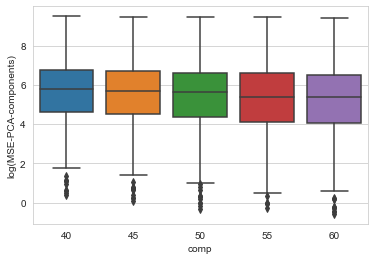

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the dataset
Boxplot= pd.read_csv("D:/Documents/final-year-project/ANALYSIS OF DR/pca-mse-analysis.csv")

sns.set_style("whitegrid")

sns.boxplot(x = 'comp', y = 'log(MSE-PCA-components)', data = Boxplot)
plt.savefig('D:/Documents/final-year-project/ANALYSIS OF DR/PCA_DR_analysis_boxplot.png', orientation = 'horizontal')